# Kernalization
Please watch before proceed [Machine Learning Lecture 22 "More on Kernels" -Cornell CS4780 SP17](https://www.youtube.com/watch?v=FgTQG2IozlM&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=22)


In this tutorial, we will learn

1. What is a kernel function, kernel matrix ?
2. Some Kernel functions: linear, polynomial, rbf, exponential, and laplacian
3. How can we kernalize linear regression ?
4. How can we kernalize Support Vector Machine?

### What does kernalizing a linear model means ?
In a nutshell, if you are a linear model, then kernalizing you means that

$$ \text{You are the weighted sum of your experiences} $$

### Setup

$$ \mathcal D = \{(x_i,y_i) \}_{i=1} ^n $$


$$ \mathcal D \sim \mathbb P(\mathcal X, \mathcal Y)$$




$$ k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$$

**kernel function**. $$ k(x,x^{'}) = < \Phi(x), \Phi(x^{'}) >$$ where $\Phi$ maps into some dot product space $\mathcal{H}$, that is also called the $\textit{feature space}$. $k$ and $\Phi$ are called a kernel and its feature map. 



### Some properties of a kernel function 

#### 1. Gram matrix
Given a kernel $k$ and inputs $x_1 , \dots , x_n \in \mathcal{X}$, the  $ n \times n $ matrix is called the Gram matrix

$$ K:= ( k (x_i,x_j))_{ij} $$



#### 2. Positive Definite Matrix.
A real $ n \times n $ symmetric matrix $K_{ij}$ satisfiying

$$ \Sigma_{i,j} c_i c_j K_{ij} \geq 0$$ for all $c_i \in \mathbb{R}$ is called positive definite.


For many others we refer [1,2].

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

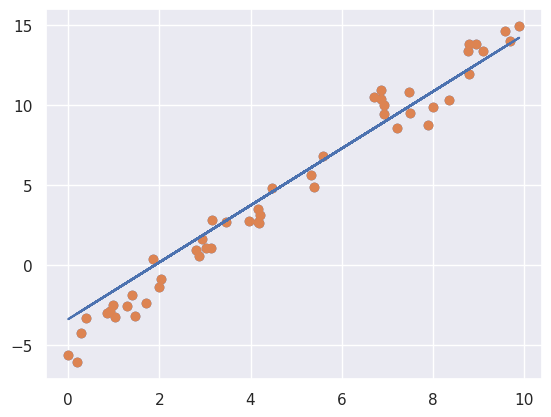

In [2]:
class LinearReg:
    def __init__(self,print_loss=False):
        self.lr=.001
        self.epoch=5000
        self.print_loss=print_loss
        self.reg=.5
        pass
    def fit(self,X,y):        
        self.w=np.random.randn(1)
        self.b=np.random.randn(1)
        for i in range(self.epoch):
            pred=X*self.w+self.b
            # Error with clipping 
            error=np.clip(y-pred, -10, 10)
            
            # (y-(Xw)**2
            sqrt_loss=((error)**2).mean() + self.reg*(self.w**2 + self.b**2)

            dpred= 2*error
            dw=-(dpred *X).mean() + .5 * self.reg*self.w
            db=-dpred.mean() + .5 * self.reg*self.b
        
            self.w -= self.lr*dw
            self.b -= self.lr*db
            
            if i %(self.epoch//10)==0:
                if self.print_loss:
                    print(sqrt_loss)

        return self
    def predict(self,X):
        return X*self.w+self.b

    
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
Y = 2 * X - 5 + rng.randn(50)
plt.scatter(X, Y)

lr=LinearReg().fit(X,Y)
plt.scatter(X, Y)
plt.plot(X, lr.predict(X))

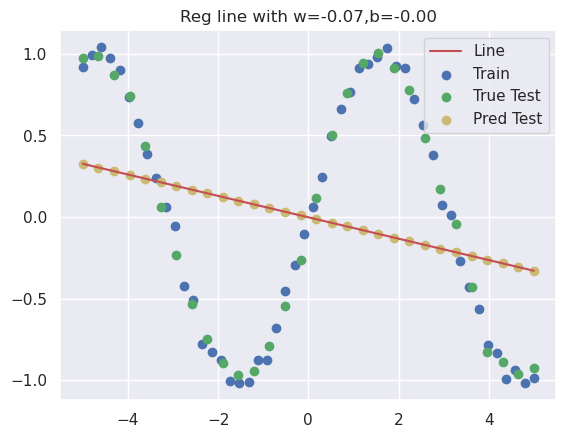

In [3]:

## Define a true function 
def f(x):
    return np.sin(x)#+(x/25)**2

def generate_input(n):
    return np.linspace(-5, 5, num=n)

N = 50    # number of training points.
n = 30     # number of testing points.
s = 0.05    # noise variance.

#X = np.arange(N)#.reshape(N,1)
#X = N * rng.rand(N)

X = generate_input(N)
Y = f(X)+s*np.random.randn(N)


Xtest= generate_input(n)
Ytest= f(Xtest) +s*np.random.randn(n)

lr=LinearReg().fit(X,Y)
plt.scatter(X, Y,label='Train')
plt.plot(X, lr.predict(X),c='r',label='Line')
plt.scatter(Xtest, Ytest,c='g',label='True Test')
plt.scatter(Xtest, lr.predict(Xtest),c='y',label='Pred Test')
plt.title(f'Reg line with w={lr.w[0]:.2f},b={lr.b[0]:.2f}')
plt.legend();

# Kernels

#### SETUP: Linear Regression, Squared Loss

$$ \mathcal L (w) = \sum_i ^n (w^T x_i- y_i)^2$$


$$ \frac{\partial \mathcal L}{\partial w}= \sum_i ^n 2(w^T x_i- y_i) x_i$$

## Proof By Induction

$$ w = \sum_i ^n \alpha_i x_i$$


$$ w^{t+1} = w^t - lr  \sum_i ^n 2(w^{t} x_i- y_i) x_i $$


### 1.  $$\alpha^{0}=[ 0 ]^n \\  w^0 = \sum_i ^n \alpha_i ^0 x_i \\ \forall i \; \alpha_i ^0 =0 \wedge w^0=0$$


### 2. $$ w_1 = \sum_i ^n \alpha_i ^0 x_i - lr \sum_i ^n 2 \Big( \big (\sum_j ^n \alpha_j ^0 x_j x_i \big ) - y_i\Big)x_i$$



# Kernalized Squared Loss


### 1.$$ \mathcal L (\alpha) = \sum_i ^n \Big( \big(\sum_j ^n \alpha_j (x_j x_i) \big)- y_i \Big)^2$$

### 2. $$ \mathcal L (\alpha) = \sum_i ^n \Big( \big(\sum_j ^n \alpha_j K_{ji} \big)- y_i \Big)^2$$



### 3. $$ \mathcal L (\alpha) = \sum_i ^n \Big( p_i - y_i \Big)^2$$
where $$ p_i=\big(\sum_j ^n \alpha_j K_{ji} \big)$$

### 3. $$ \frac{\partial \mathcal L}{ \partial \alpha } = 2*\Big( \big(\sum_j ^n \alpha_j K_{ji} \big)- y_i \Big) * \big(\sum_j ^n K_{ji} \big) $$


In [4]:
def polynomial_kernel(x,y,d=3):
    return (1+np.sum(x*y))**d

def exponential_kernel(a,b,sigma=.2,mu=0):
    x=a-b
    return np.exp(-0.5 * ( 1/(2*np.power(sigma,2)) ) * ( np.power(x-mu,2)))

def laplacian_kernel(a,b,sigma=.2,mu=0):
    x=a-b
    return np.exp(-0.5 * ( 1/(2*np.power(sigma,2)) ) * ( np.abs(x-mu)))

def rbf(x,z,sigma=.05,mu=0):
    d=np.sqrt(np.sum(np.power(x-z,2)))
    d/=(sigma**2)
    return np.exp(-d)

In [5]:
class KernelLinearRegression:
    """ Kernel Ridge Regression """
    def __init__(self,reg=1,sigma=1,mu=0,print_loss=False):
        self.lr=.01
        self.reg=reg
        self.epoch=1_000
        self.print_loss=print_loss
        self.sigma=sigma
        self.mu=mu
    def create_kernel_matrix(self):
        gram_matrix=np.zeros((len(self.X),len(self.X)))
        for i in range(len(self.X)):            
            for j in range(len(self.X)):
                gram_matrix[i][j]=self.kernel(self.X[i],self.X[j],sigma=self.sigma,mu=self.mu)
        return gram_matrix
    
    def fit(self,X,y,kernel):        
        self.X=X
        self.Y=y
        self.kernel=kernel
        self.alpha=np.random.randn(len(self.X))
        
        self.K=self.create_kernel_matrix()

        n=len(X)
        for e in range(self.epoch):
            epoch_sqrt_loss=0
            epoch_dalpha=np.zeros(self.alpha.shape)
            for i in range(len(X)):
                pred=np.sum(self.alpha*self.K[i,:])
                err=pred-self.Y[i]
                
                cost=err**2
                epoch_sqrt_loss+=cost
                
                # Derivative w.r.t. prediction
                dpred=2*err
                # Derivative w.r.t. alpha
                dalpha=dpred * self.K[i,:]
                # Average gradients.
                #dalpha/=n
                dalpha/=n
                epoch_dalpha+=dalpha


            epoch_sqrt_loss+=self.reg*np.sum(self.alpha**2)
            
            self.alpha-=(self.lr*epoch_dalpha) + self.lr*self.reg*(2*self.alpha)
                
            avg_loss=epoch_sqrt_loss/n
            if avg_loss<0.001:
                print(f'Iteration:{e}\t Average loss:{avg_loss:.3f}')
                break
            if e %(self.epoch//10)==0:
                if self.print_loss:
                    print(f'Iteration:{e}\t Average loss:{avg_loss:.3f}')
        return self
    def predict(self,X):
        preds=[]
        for j in range(len(X)):
            preds.append(np.sum(self.alpha*self.K[j,:]))
        return np.array(preds)  
    
    def plot(self,X,Y):
        plt.scatter(X, Y,label='Train')
        plt.plot(X, self.predict(X),c='r',label='Line')
        plt.legend()
        plt.title(f'Kernel Regresion sigma:{self.sigma}, reg:{self.reg}')
        plt.show()

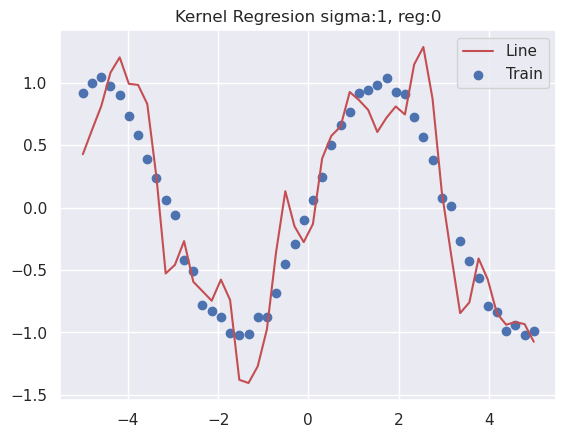

In [6]:
KernelLinearRegression(sigma=1,reg=0).fit(X,Y,kernel=rbf).plot(X,Y)

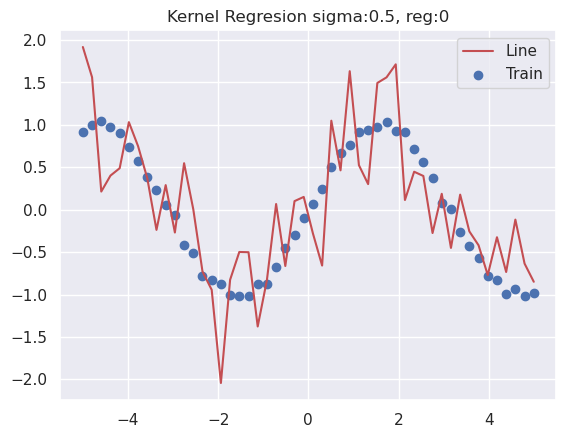

In [7]:
KernelLinearRegression(sigma=.5,reg=0).fit(X,Y,kernel=rbf).plot(X,Y)

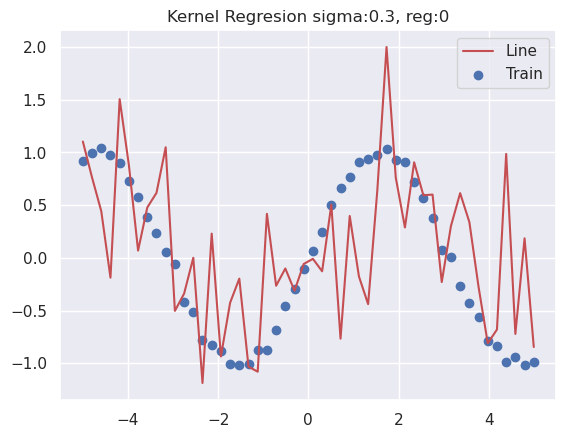

In [8]:
KernelLinearRegression(sigma=.3,reg=0).fit(X,Y,kernel=rbf).plot(X,Y)

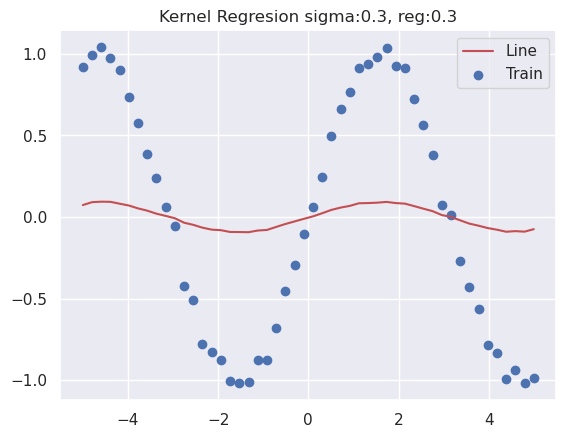

In [9]:
KernelLinearRegression(sigma=.3,reg=0.3).fit(X,Y,kernel=rbf).plot(X,Y)

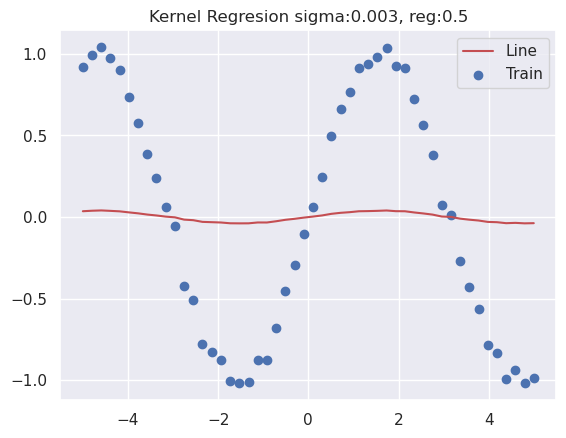

In [10]:
KernelLinearRegression(sigma=.003,reg=.5).fit(X,Y,kernel=rbf).plot(X,Y)

__Kernels are "magical", aren't they ?__